In [11]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [12]:
class Sudoku:
    def __init__(self,initial_grid=None):
        self.sudoku     = self._initialize_sudoku(initial_grid)
        self.numberlist = self._initialize_numberlist()
        self.positions  = self._initialize_positions()
        self.solution   = np.zeros((9,9),dtype=int)

    def _initialize_sudoku(self,initial_grid):
        if initial_grid is None:
            return np.zeros((9,9),dtype=int)
        return initial_grid

    @staticmethod
    def _initialize_positions():
        return [(i,j) for i in range(0,9) for j in range(0,9)]

    @staticmethod
    def _initialize_numberlist():
        return np.array([1,2,3,4,5,6,7,8,9])

    def _is_possible(self,row,col,number):
        ## Checking column
        for i in range(0,9):
            if self.sudoku[i][col] == number:
                return False
        ## Checking row
        for i in range(0,9):
            if self.sudoku[row][i] == number:
                return False
        ## Checking square
        row_0, col_0 = (row//3) * 3, (col//3) * 3
        for i in range(0,3):
            for j in range(0,3):
                if self.sudoku[row_0 + i][col_0 + j] == number:
                    return False
        return True

    def _check_sudoku(self):
        for row in range(0 ,9):
            for col in range(0 ,9):
                if self.sudoku[row][col] == 0:
                    return False
        # We have a complete grid!
        return True

    def _permute_numberlist(self):
        self.numberlist = np.random.permutation(self.numberlist)

    def _permute_positions(self):
        self.positions = np.random.permutation(self.positions)

    def fill_sudoku(self):
        self._permute_numberlist()
        # Find next empty cell
        row, col = None, None
        for i in range(0, 81):
            row = i // 9
            col = i % 9
            if self.sudoku[row][col] == 0:
                for number in self.numberlist:
                    # Check that this value has not already be used
                   if self._is_possible(row,col,number):
                        self.sudoku[row][col]   = number
                        self.solution[row][col] = number
                        if self._check_sudoku():
                            return True
                        else:
                            if self.fill_sudoku():
                                return True
                break
        self.sudoku[row][col]   = 0
        self.solution[row][col] = 0

    def generate_unique_sudoku(self):
        currently_removed = None
        self._permute_positions()
        pos_nr = 0
        while pos_nr < 81:
            row,col               = self.positions[pos_nr]
            currently_removed     = self.sudoku[row][col]
            self.sudoku[row][col] = 0
            self._permute_numberlist()
            solution_counter = 0
            for number in self.numberlist:
                if self._is_possible(row,col,number):
                    solution_counter += 1
            if solution_counter > 1:
                self.sudoku[row][col] = currently_removed
                pos_nr += 1
            elif solution_counter == 1:
                pos_nr += 1
            elif solution_counter == 0:
                break

    def print_sudoku(self):
        for row in range(self.sudoku.shape[0]):
            if row % 3 == 0 and row != 0:
                print("- - - - - - - - - - -")
            for col in range(self.sudoku.shape[1]):
                if col % 3 == 0 and col != 0:
                    print("| ", end = "")
                if col == 8:
                    print(self.sudoku[row][col])
                else:
                    print(str(self.sudoku[row][col]) + " ", end="")




In [13]:
my_sudoku = Sudoku()
my_sudoku.fill_sudoku()
my_sudoku.print_sudoku()

5 8 3 | 6 9 1 | 7 4 2
9 1 7 | 3 2 4 | 6 8 5
6 2 4 | 5 8 7 | 1 9 3
- - - - - - - - - - -
2 9 1 | 8 6 3 | 4 5 7
7 3 5 | 1 4 9 | 2 6 8
4 6 8 | 2 7 5 | 9 3 1
- - - - - - - - - - -
3 5 2 | 4 1 6 | 8 7 9
1 7 6 | 9 5 8 | 3 2 4
8 4 9 | 7 3 2 | 5 1 6


In [15]:
my_sudoku.generate_unique_sudoku()
my_sudoku.print_sudoku()

5 0 3 | 0 9 0 | 7 4 0
0 1 0 | 0 2 0 | 0 8 5
6 0 0 | 0 8 7 | 1 0 3
- - - - - - - - - - -
0 9 0 | 8 0 0 | 4 5 7
7 3 0 | 1 0 9 | 0 6 0
0 6 0 | 2 0 5 | 0 0 1
- - - - - - - - - - -
3 5 2 | 0 0 6 | 8 7 0
0 0 6 | 0 5 0 | 3 0 4
8 0 0 | 7 3 2 | 5 0 0


In [16]:
# https://www.nature.com/articles/nature.2012.9751
# Needs at least 17 numbers

def set_holes(grid,remaining_numbers=81):
    assert remaining_numbers >= 17, "Should have at least 17 numbers according to https://www.nature.com/articles/nature.2012.9751"
    ## Generating random indices
    indices = np.random.permutation([[i,j] for i in range(9) for j in range(9)])[:81-remaining_numbers]
    ## Sets zero
    grid[indices[:,0],indices[:,1]] = 0


In [17]:
%%time
NR_SUDOKUS = 1000
non_zeros = []
for _ in range(NR_SUDOKUS):
    my_sudoku = Sudoku()
    my_sudoku.fill_sudoku()
    my_sudoku.generate_unique_sudoku()
    counter = 0
    for i in range(9):
        for j in range(9):
            if my_sudoku.sudoku[i][j] != 0:
                counter += 1
    non_zeros.append(counter)


CPU times: user 6.29 s, sys: 133 ms, total: 6.42 s
Wall time: 6.44 s


34


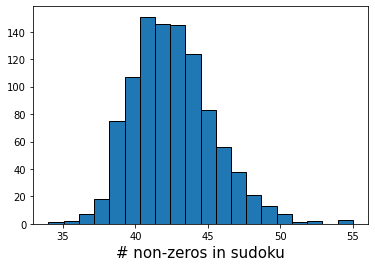

In [21]:
plt.hist(non_zeros,bins=20,edgecolor="k")
plt.xlabel("# non-zeros in sudoku",fontsize=15)
print(np.min(non_zeros))
plt.show()